# STATS 10 Assignment 3
Please submit both parts of the assignment in one single PDF file. You can use any PDF editor
software to merge the two parts into one file. Please make sure that the questions are in the correct
order and clearly labeled, and that the answers are legible and easy to read.
To submit your assignment, upload the PDF file under the designated assignment page on the
course website before the deadline specified. Email or hard copy submissions are not accepted.

## Part I
Include both the R commands and their corresponding outputs, results, or answers for all
exercise questions in Part I.

### Exercise 1
We will be working with some soil mining data and are interested in looking at some of the
relationships between metal concentrations (in ppm). Download the data ‘soil_complete.txt’
from the course website and read it into R. When you read in the data, name your object “soil”


Call:
lm(formula = lead ~ zinc)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.455 -12.570  -1.834  15.946 101.651 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.582928   4.410443    3.76 0.000244 ***
zinc         0.291335   0.007415   39.29  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.37 on 149 degrees of freedom
Multiple R-squared:  0.912,	Adjusted R-squared:  0.9114 
F-statistic:  1544 on 1 and 149 DF,  p-value: < 2.2e-16


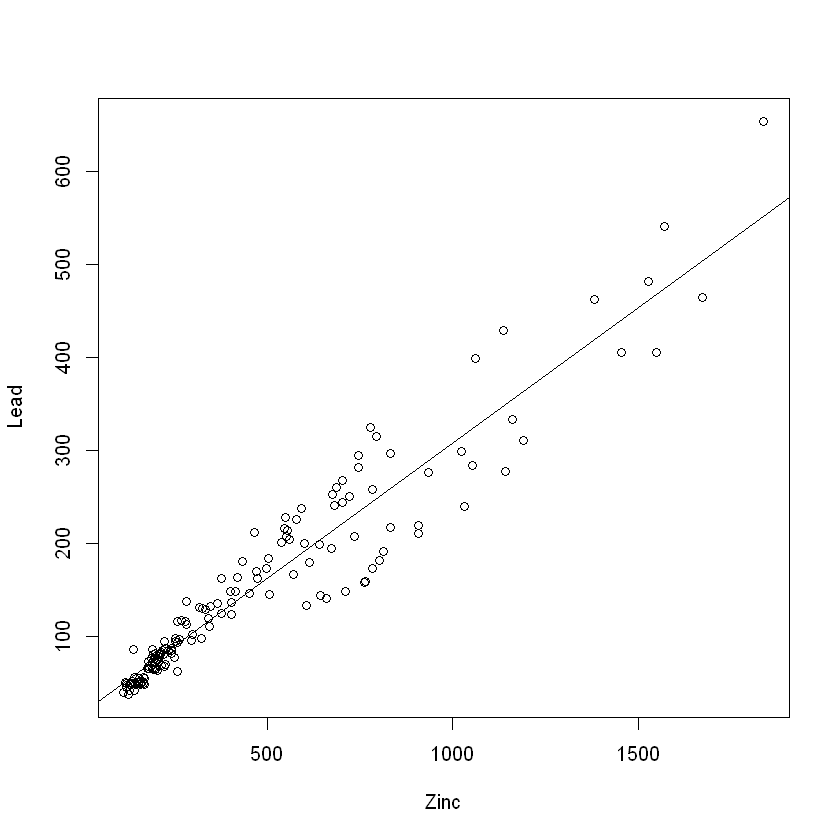

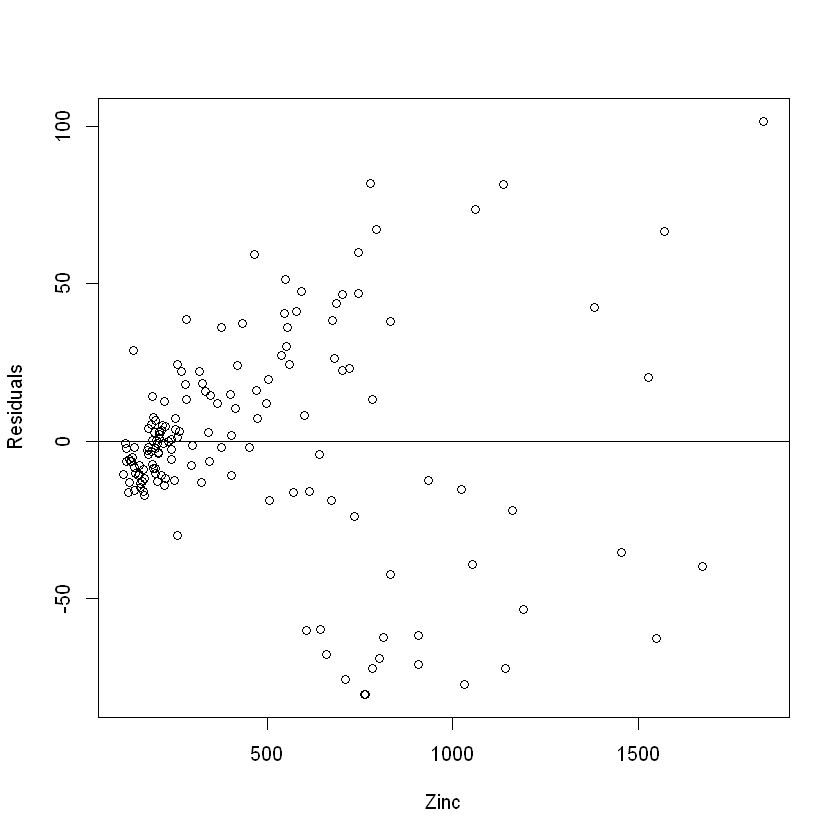

In [16]:
# set wd
setwd("C:/Users/sanji/Documents/School/Classes/Stats 10/Assignment 3")
# read in data from soil_complete.txt
soil <- read.table("soil_complete.txt", header = TRUE)
# a. Run a linear regression of lead against zinc concentrations (treat lead as the response variable). Use the summary function just like in the example above and paste the output into your report.
lead <- soil$lead
zinc <- soil$zinc
lead.zinc <- lm(lead ~ zinc)
summary(lead.zinc)
# b. Plot the lead and zinc data, then use the abline() function to overlay the regression line onto the data.
plot(zinc, lead, xlab = "Zinc", ylab = "Lead")
abline(lead.zinc)
# c. In a separate plot, plot the residuals of the regression from (a), and again use the abline() function to overlay a horizontal line.
plot(zinc, lead.zinc$residuals, xlab = "Zinc", ylab = "Residuals")
abline(h = 0)




Parts d-h can be answered by hand, using a calculator, or any R functions of your choice.


In [17]:
# d. Based on the output from (a), what is the equation of the linear regression line?
# Regression is y = 0.291335x + 16.582928
A <- round(summary(lead.zinc)$coefficients[2,1], 3)
B <- round(summary(lead.zinc)$coefficients[1,1], 3)
# these are too many digits, so round to 3
print(paste("y = ", A, "x + ", B, sep = ""))
# e. Imagine we have a new data point. We find out that the zinc concentration at this point is 1,000 ppm. What would we expect the lead concentration at this point to be?
predict(lead.zinc, data.frame(zinc = 1000))
print(paste("We would expect the lead concentration to be ", round(predict(lead.zinc, data.frame(zinc = 1000)), 2), " ppm.", sep = ""))
# f. Imagine two locations (A and B) for which we only observe zinc concentrations. Location A contains 100ppm higher concentration of zinc than location B. How much higher would we expect the lead concentration to be in location A compared to location B?
predict(lead.zinc, data.frame(zinc = 100)) - predict(lead.zinc, data.frame(zinc = 0))
print(paste("We would expect the lead concentration to be ", round(predict(lead.zinc, data.frame(zinc = 100)) - predict(lead.zinc, data.frame(zinc = 0)), 2), " ppm higher in location A than in location B.", sep = ""))
# g. Report the R-squared value and explain in words what it means in context.
print(paste("The R-squared value is ", round(summary(lead.zinc)$r.squared, 3), ".", sep = ""))
print(paste("This means that ", round(summary(lead.zinc)$r.squared, 3) * 100, "% of the variation in lead concentration can be explained by the variation in zinc concentration.", sep = ""))
# h. Comment on whether you believe the three main assumptions (linearity, symmetry, equal variance) for linear regression are met for this data. List any concerns you have.
print("The linearity, symmetry, and equal variance assumption is met because the residuals are randomly distributed around 0.")
print("However, there is a concern that the residuals are higher at the ends of the graph.")





[1] "y = 0.291x + 16.583"


1 
307.9184

[1] "We would expect the lead concentration to be 307.92 ppm."


1 
29.13355

[1] "We would expect the lead concentration to be 29.13 ppm higher in location A than in location B."
[1] "The R-squared value is 0.912."
[1] "This means that 91.2% of the variation in lead concentration can be explained by the variation in zinc concentration."
[1] "The linearity, symmetry, and equal variance assumption is met because the residuals are randomly distributed around 0."
[1] "However, there is a concern that the residuals are higher at the ends of the graph."


### Exercise 2
Our next data set is what is known as a time series, or data in time. It contains the measurements via satellite imagery of sea ice extent in millions of square kilometers for each month from 1988 to 2011. Please download the “sea_ice” data from the course website and read it into R. If you have your working directory properly set, you can use the line below:


`ice <- read.csv("sea_ice.csv", header = TRUE) `

Note that currently R does not know what class the Date column is. We need to convert the Date column into class “date” using the following line: 

`ice$Date <- as.Date(ice$Date, "%m/%d/%Y")`


Call:
lm(formula = Extent ~ days, data = ice)

Residuals:
   Min     1Q Median     3Q    Max 
-9.445 -5.439  1.442  5.599  7.564 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.106e+01  6.800e-01  16.260   <2e-16 ***
days        1.438e-04  1.411e-04   1.019    0.309    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.654 on 273 degrees of freedom
Multiple R-squared:  0.003787,	Adjusted R-squared:  0.0001377 
F-statistic: 1.038 on 1 and 273 DF,  p-value: 0.3093


[1] "There seems to be a trend in this data, but this trend has a lot of variation."


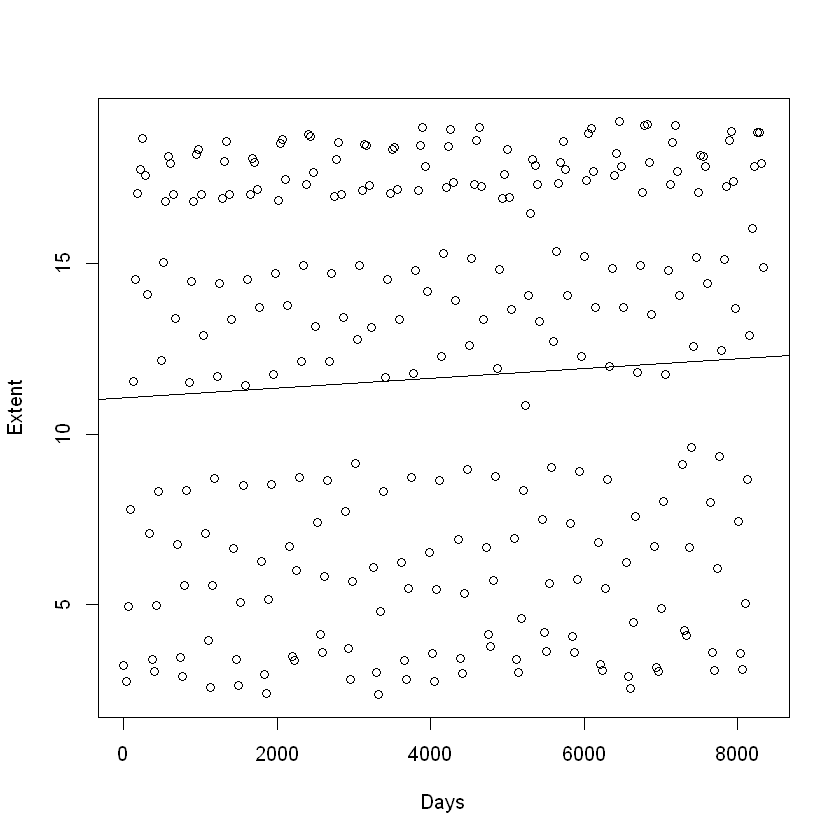

[1] "We should be concerned about the assumption of equal variance because the residuals are not randomly distributed around 0."


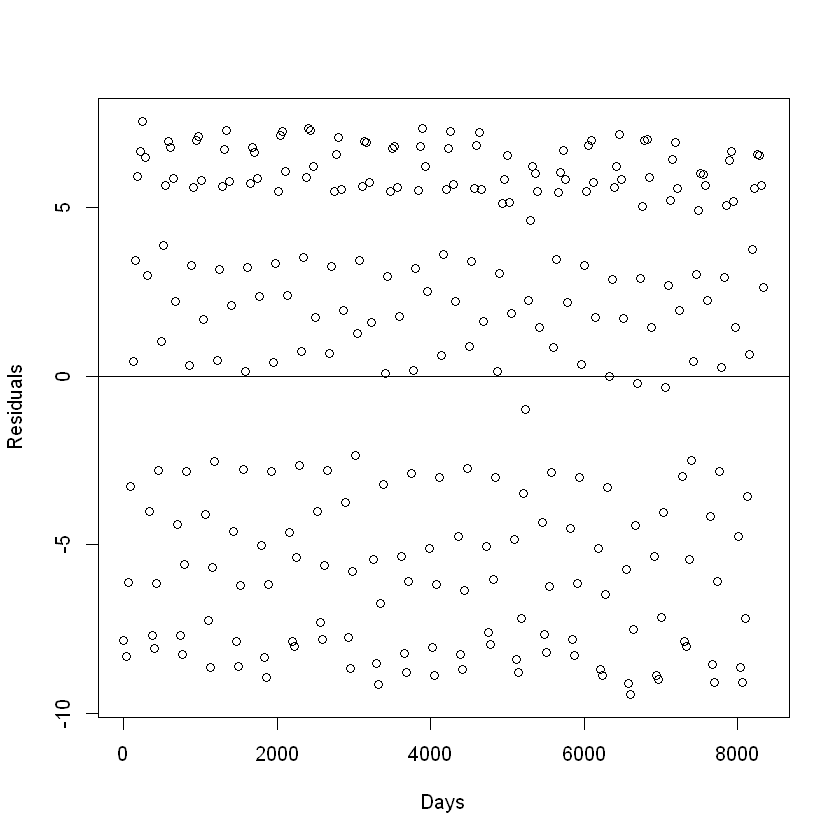

In [44]:
ice <- read.csv("sea_ice.csv", header = TRUE)
ice$Date <- as.Date(ice$Date, "%m/%d/%Y")
# Make this days since the first date
ice$days <- as.numeric(ice$Date - ice$Date[1])
# a. Produce a summary of a linear model of sea ice extent against time
ice.extent <- lm(Extent ~ days, data = ice)
summary(ice.extent)
# b. Plot the data and overlay the regression line. Does there seem to be a trend in this data?
plot(ice$days, ice$Extent, xlab = "Days", ylab = "Extent")
abline(ice.extent)
print("There seems to be a trend in this data, but this trend has a lot of variation.")
# c. Plot the residuals of the model over time and include a horizontal line. What assumption(s) about the linear model should we be concerned about?
plot(ice$days, ice.extent$residuals, xlab = "Days", ylab = "Residuals")
abline(h = 0)
print("We should be concerned about the assumption of equal variance because the residuals are not randomly distributed around 0.")




### Exercise 3
One of Adam’s favorite casino games is called “Craps”. In the first round of this game, two fair 6-sided dice are rolled. If the sum of the two dice equal 7 or 11, Adam doubles his money! If a 2, 3, or 12 are rolled, Adam loses all the money he bets L.

[1] "The chance Adam will double his money is 8/36, or 22.2%."
[1] "The percentage of time Adam doubled his money is 21.88%."
[1] "The percentage of time Adam lost his money is 11.72%."
[1] "These two events are disjoint because Adam cannot win and lose money at the same time."
[1] "Since they are disjoint, they are not independent."
[1] "Calculating P(A|B) = 0.67 and P(A) = 0.22 shows that they are not equal."


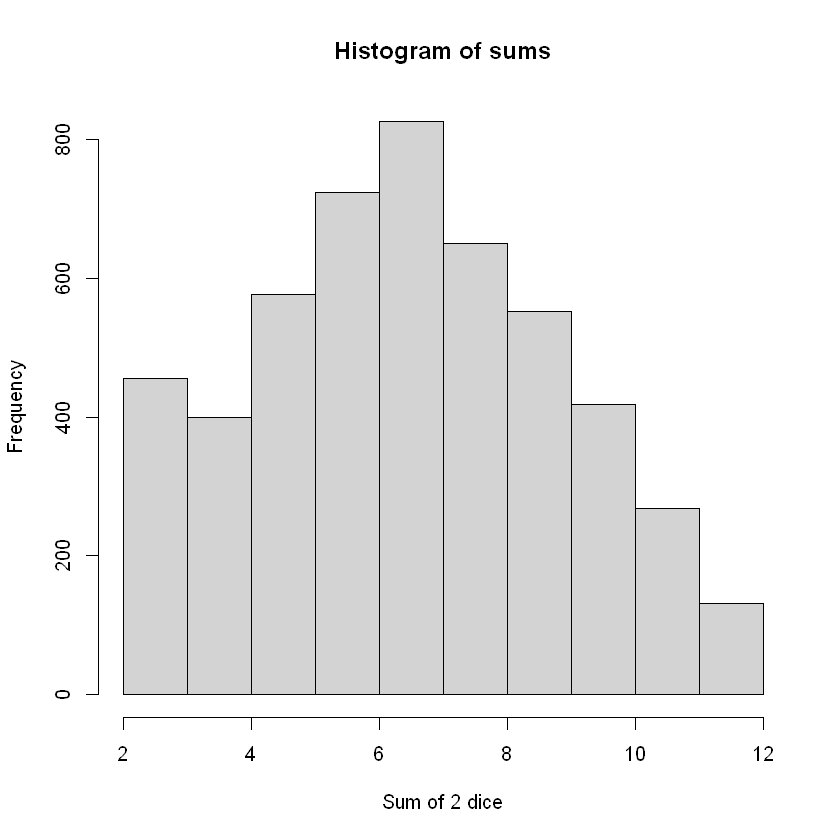

In [58]:
# One of Adam’s favorite casino games is called “Craps”. In the first round of this game, two fair 6-sided dice are rolled. If the sum of the two dice equal 7 or 11, Adam doubles his money! If a 2, 3, or 12 are rolled, Adam loses all the money he bets L.

# a. Based on your lecture notes, what is the chance Adam will double his money in the first round of the game? What is the chance Adam will lose his money in the first round of the game?
print("The chance Adam will double his money is 8/36, or 22.2%.")
# b. Let’s now approximate the results in (a) by simulation. First, set the seed to 123. Then, create an object that contains 5,000 sample first round Craps outcomes (simulate the sum of 2 dice, 5,000 times). Use the appropriate function to visualize the distribution of these outcomes (hint: are the outcomes discrete or continuous?).
set.seed(123)
dice = c(1:6)
craps = replicate(5000, sample(dice, 2, replace = TRUE))
sums = colSums(craps)
hist(sums, breaks = 10, xlab = "Sum of 2 dice", ylab = "Frequency")
# c. Imagine these sample results happened in real life for Adam. Using R functions of your choice, calculate the percentage of time Adam doubled his money. Calculate the percentage of time Adam lost his money.
print(paste("The percentage of time Adam doubled his money is ", round(sum(sums == 7 | sums == 11) / 5000 * 100, 2), "%.", sep = ""))
print(paste("The percentage of time Adam lost his money is ", round(sum(sums == 2 | sums == 3 | sums == 12) / 5000 * 100, 2), "%.", sep = ""))
# d. Adam winning money and Adam losing money can both be considered events. Are these two events independent, disjoint, or both? Explain why.
print("These two events are disjoint because Adam cannot win and lose money at the same time.")
# e. Quickly mathematically verify by calculator if those events are independent using part (a) and what you learned in lecture. Show work.
print("Since they are disjoint, they are not independent.")
print(paste("Calculating P(A|B) = ", round(8/36 / (8/36 + 4/36), 2), " and P(A) = ", round(8/36, 2), " shows that they are not equal.", sep = ""))



## Part II
You may choose to type or write your answers electronically or scan your handwritten
solutions. Please ensure that you show all steps and explanations to receive full credit,
unless otherwise instructed

### Exercise 1
Assume the grades possible in a history course are A, B, C, or lower than C. The probability that
a randomly selected student will get an A in the course is 0.32, the probability that a student will
get a B in the course is 0.21, and the probability that a student will get a C in the course is 0.23.

In [59]:
# a. What is the probability that a student will get an A OR a B?
print(paste("The probability that a student will get an A OR a B is ", round(0.32 + 0.21, 2), ".", sep = ""))
# b. What is the probability that a student will get an A OR a B OR a C?
print(paste("The probability that a student will get an A OR a B OR a C is ", round(0.32 + 0.21 + 0.23, 2), ".", sep = ""))
# c. What is the probability that a student will get a grade lower than a C?
print(paste("The probability that a student will get a grade lower than a C is ", round(1 - 0.32 - 0.21 - 0.23, 2), ".", sep = ""))




[1] "The probability that a student will get an A OR a B is 0.53."
[1] "The probability that a student will get an A OR a B OR a C is 0.76."
[1] "The probability that a student will get a grade lower than a C is 0.24."


### Exercise 2
De Mere’s Dice Problem

In [60]:
# a. Let E be the event of getting at least one six in four rolls of a single die. Find P(E).
print(paste("The probability of getting at least one six in four rolls of a single die is ", round(1 - (5/6)^4, 2), ".", sep = ""))
# b. Let F be the event of getting at least one double six in 24 throws. Find P(F).
print(paste("The probability of getting at least one double six in 24 throws is ", round(1 - (35/36)^24, 2), ".", sep = ""))


[1] "The probability of getting at least one six in four rolls of a single die is 0.52."
[1] "The probability of getting at least one double six in 24 throws is 0.49."


### Exercise 3
A patient is displaying some symptoms and received a disease screening test. The test comes
back positive 99% of the time for people who have the disease, and comes back negative 97% of
the time for people who do not have the disease. The doctor knows that the disease affects 1 in
100 people in the country. Suppose the test result for the patient came back positive, what is the
probability that the patient actually has the disease?

In [78]:
# A: patient has disease
# B: patient tests positive
# P(A) = 0.01
# P(B|A) = 0.99
# P(B|A') = 0.03
# P(A|B) = P(B|A) * P(A) / P(B)
# P(B) = P(B|A) * P(A) + P(B|A') * P(A')
# P(A|B) = 0.99 * 0.01 / (0.99 * 0.01 + 0.03 * 0.99) = 0.25
print(paste("The probability that the patient actually has the disease is ", round(0.99 * 0.01 / (0.99 * 0.01 + 0.03 * 0.99), 2), ".", sep = ""))

[1] "The probability that the patient actually has the disease is 0.25."


### Exercise 4
Suppose you flip a fair coin 100 times and record the results. You get 58 heads and 42 tails.

In [74]:
# Suppose you flip a fair coin 100 times and record the results. You get 58 heads and 42 tails.
# a. Find both the theoretical probability and the empirical probability of getting heads.
print(paste("The theoretical probability of getting heads is ", round(0.5, 2), ".", sep = ""))
print(paste("The empirical probability of getting heads is ", round(58/100, 2), ".", sep = ""))
# b. Find both the theoretical probability and the empirical probability of getting tails.
print(paste("The theoretical probability of getting tails is ", round(0.5, 2), ".", sep = ""))
print(paste("The empirical probability of getting tails is ", round(42/100, 2), ".", sep = ""))
# c. If you were to flip the coin 1000 times and record the proportion of times that you get heads, what empirical probability would you expect to observe? Why?
print(paste("I would expect to observe a probability of ", round(0.5, 2), " because the coin is fair.", sep = ""))
print(paste("The more times the experiment is run, the closer the empirical probability will be to the theoretical probability.", sep = ""))
# d. Give an example of a real-life situation where empirical probabilities would be useful
print("Empirical probabilities are useful when true probabilities are unknown or difficult to calculate. Examples include the probability of a sports team winning a game or the probability of a stock increasing in value.")




[1] "The theoretical probability of getting heads is 0.5."
[1] "The empirical probability of getting heads is 0.58."
[1] "The theoretical probability of getting tails is 0.5."
[1] "The empirical probability of getting tails is 0.42."
[1] "I would expect to observe a probability of 0.5 because the coin is fair."
[1] "The more times the experiment is run, the closer the empirical probability will be to the theoretical probability."
[1] "Empirical probabilities are useful when true probabilities are unknown or difficult to calculate. Examples include the probability of a sports team winning a game or the probability of a stock increasing in value."


### Exercise 5
Adam wants to go skiing on the weekend, but only if there are 3 inches or more of new snow.
According to the weather report, any amount of new snow between 1 inch and 6 inches is equally
likely. The probability density curve for weekend’s new snow depth is shown

[1] "This is a uniform probability distribution."
[1] "The probability density function has a value of 0.2 because the area under the curve must equal 1."
[1] "The length of the base of the rectangle is 6 - 1 = 5. Therefore the height = 1/5 = 0.2."
[1] "The probability that the new snow depth will be 3 inches or more on the weekend is 0.6."


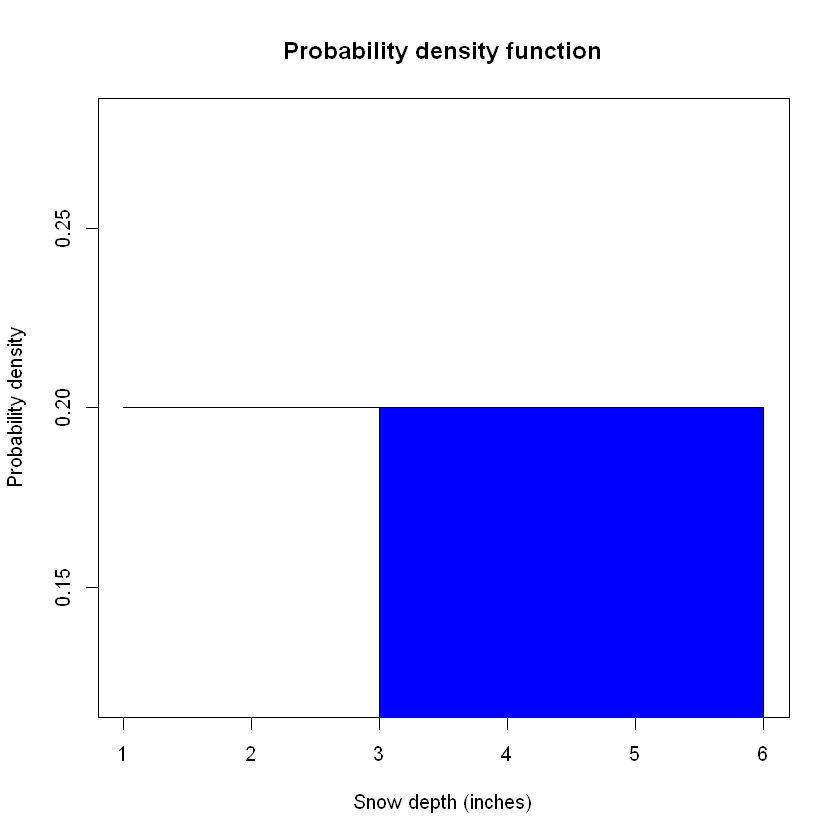

In [76]:
# a. What is the name of this probability distribution?
print("This is a uniform probability distribution.")

# b. Why does the probability density function have a value of 0.2?
print("The probability density function has a value of 0.2 because the area under the curve must equal 1.")
print("The length of the base of the rectangle is 6 - 1 = 5. Therefore the height = 1/5 = 0.2.")

# c. Find the probability that the new snow depth will be 3 inches or more on the weekend and shade the appropriate area in the graph.
x = seq(1, 6, 0.01)
y = rep(0.2, length(x))
plot(x, y, type = "l", xlab = "Snow depth (inches)", ylab = "Probability density", main = "Probability density function")
x1 = seq(3, 6, 0.01)
y1 = rep(0.2, length(x1))
polygon(c(3, x1, 6), c(0, y1, 0), col = "blue")
print(paste("The probability that the new snow depth will be 3 inches or more on the weekend is ", round(0.2 * (6 - 3), 2), ".", sep = ""))